# О возникновении силы тяги в системе вращающихся зарядов

In [1]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    double tlag(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
               double xc, double yc, double zc,
               double R, double omega, double alpha)
    # отношение радиуса Лиенара Вихерта к радиусу
    double klw(double x, double y, double z, double t,
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                              double xc, double yc, double zc, double R, double omega, double alpha),
               double xc, double yc, double zc, double R, double omega, double alpha)
    # Радиус Лиенара Вихерта
    double Rlw(double x, double y, double z, double t,
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                              double xc, double yc, double zc, double R, double omega, double alpha),
               double xc, double yc, double zc, double R, double omega, double alpha)
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    double philw(double x, double y, double z, double t,
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double q,
               double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                              double xc, double yc, double zc, double R, double omega, double alpha),
               double xc, double yc, double zc, double R, double omega, double alpha)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(double x, double y, double z, double t,
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double q,
               double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                              double xc, double yc, double zc, double R, double omega, double alpha),
           double * A_x, double * A_y, double * A_z,
               double xc, double yc, double zc, double R, double omega, double alpha
           )
    
    void electr_magnet(double x, double y, double z, double t,
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double q, double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                                         double xc, double yc, double zc, double R, double omega, double alpha), 
                double * E_x, double * E_y, double * E_z, double * B_x, double * B_y, double * B_z,
               double xc, double yc, double zc, double R, double omega, double alpha)

    void cset_c(double _c)
    void cset_timespan_Epsilon(double _eps)
    double cget_c()
    double cget_timespan_Epsilon()

#sgs 
import numpy as np
cdef double c# = np.float128(1)
cdef double timespan_Epsilon = np.float128(1.0e-8)

cdef double R_r = np.float128(1)
cdef double R_l = np.float128(1)
cdef double S = np.float128(0.005)

# centers of circles
cr = ( S/2+R_r, np.float128(0), np.float128(0))
cl = (-S/2-R_l, np.float128(0), np.float128(0))

cdef double xc_l = cl[0]
cdef double xc_r = cr[0]

cdef double yc_l = cl[1]
cdef double yc_r = cr[1]

cdef double zc_l = cl[2]
cdef double zc_r = cr[2]

cdef double sx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = xc + R*np.cos(current_angle)
    return result
cdef double sy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = yc + R*np.sin(current_angle)
    return result
cdef double sz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = zc
    return result

cdef double vx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*R*np.sin(current_angle)
    return result
cdef double vy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef long double result
    cdef double current_angle = omega * t + alpha
    result = omega*R*np.cos(current_angle)
    return result
cdef double vz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = 0
    return result


cdef double wx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*omega*R*np.cos(current_angle)
    return result
cdef double wy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*omega*R*np.sin(current_angle)
    return result
cdef double wz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = 0
    return result

def R_lw(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t

    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))

    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    cdef double r_lw = Rlw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, tlag, Xc, Yc, Zc, Rc, Omega, Alpha)

    return r_lw

def phi_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t

    cdef double q_ = q
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha

    cdef double philw_ = philw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, q_, tlag, Xc, Yc, Zc, Rc, Omega, Alpha)

    return philw_


def A_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q_ = q
    
    cdef double A_x
    cdef double A_y
    cdef double A_z
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha

    Alw(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz,
                  q_, tlag, 
                  &A_x, &A_y, &A_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (A_x, A_y, A_z)

def EB_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q_ = q
    
    cdef double E_x
    cdef double E_y
    cdef double E_z
    cdef double B_x
    cdef double B_y
    cdef double B_z
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    electr_magnet(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
                  q_, tlag, 
                  &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (E_x, E_y, E_z, B_x, B_y, B_z)

def t_lag(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q = 1
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    
    # расчет итерациями запаздывающего момента
    cdef double lag = tlag(Xa, Ya, Za, ta,
                  sx, sy, sz,
                           Xc, Yc, Zc, Rc, Omega, Alpha)
    return lag


def calc_sum_Fy_t(N, S, R_l, R_r, t_i,
                  omega,
                  alpha0_l = np.float128(0),
                  alpha0_r = np.float128(0),
                  to_animate = False,
                  to_log = False):
    
    cdef int n = N
    cdef double sign_a
    cdef double sign_q
    
    cdef double Alpha_l
    cdef double Alpha_r
    
    cdef double Omega_l = + omega
    cdef double Omega_r = - omega
    
    cdef double Xa, Ya, Za
    cdef double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef double Fx_l = 0.0
    cdef double Fy_l = 0.0
    cdef double Fx_r = 0.0
    cdef double Fy_r = 0.0
    
    #F_alpha_l = []
    #F_alpha_r = []
    frames = []

    for i_a in range(n):
        for i_q in range(n):
            if to_animate:
                from sage.plot.all import Graphics
                p = Graphics()
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            if to_animate:
                if sign_a > 0:
                    color_a = "red"
                else:
                    color_a = "blue"
                if sign_q > 0:
                    color_q = "red"
                else:
                    color_q = "blue"
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            Xa = sx(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Xq = sx(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Ya = sy(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Yq = sy(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Za = sz(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Zq = sz(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            if to_animate:
                from sage.plot.circle import circle
                from sage.plot.line import line
                p += circle((cr[0],cr[1]), R_r)
                p += circle((cl[0],cl[1]), R_l)
                p += line ([(cr[0],cr[1]), (Xq, Yq)], color = color_q, linestyle="solid")
                p += line ([(cl[0],cl[1]), (Xa, Ya)], color = color_a, linestyle="solid")
                
                # время запаздывания поля правого заряда в области левого заряда
                t2_a = t_lag(Xa, Ya, Za, t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                # запаздывающая координата правого заряда в момент прихода его поля в область левого заряда
                X2_q = sx(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                Y2_q = sy(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                
                # время запаздывания поля левого заряда в области правого заряда
                t2_q = t_lag(Xq, Yq, Zq, t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                # запаздывающая координата левого заряда в момент прихода его поля в область правого заряда
                X2_a = sx(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                Y2_a = sy(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                
                if (to_log):
                    print("t2_a=%f t2_q=%f t2_a*omega/2pi=%f t2_q*omega/2pi=%f" % (t2_a, t2_q, t2_a*omega/(2*np.pi), t2_q*omega/(2*np.pi)))
            
            # поле создаваемое правым вращающимся зарядом в области левого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            # сила действующая на левый заряд со стороны поля правого заряда
            fx_l = (E_x)*sign_a
            fy_l = (E_y)*sign_a

            Fx_l += fx_l
            Fy_l += fy_l
            
            # поле создаваемое левым вращающимся зарядом в области правого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xq, Yq, Zq, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            # сила действующая на правый заряд со стороны поля левого заряда
            fx_r = (E_x)*sign_q
            fy_r = (E_y)*sign_q
            
            Fx_r += fx_r
            Fy_r += fy_r
            
            if to_animate:
                p += line ([(Xq, Yq), (X2_a, Y2_a)], color = "green", linestyle="dashed")
                p += line ([(X2_q, Y2_q), (Xa, Ya)], color = "green", linestyle="dashed")
                p += line ([(cr[0],cr[1]), (X2_q, Y2_q)], color = color_q, linestyle="dashed")
                p += line ([(cl[0],cl[1]), (X2_a, Y2_a)], color = color_a, linestyle="dashed")

            if to_log:
                print("fx_l=%f fy_l=%f fx_r=%f fy_r=%f" % (fx_l, fy_l, fx_r, fy_r))
            if to_animate:
                p.show(aspect_ratio = 1)
                frames += [p]

    # Интегральная величина тяги в направлении оси y
    # угловое усилие

    return Fy_r + Fy_l

def calc_Maxwells_stress_tensor(X_a, Y_a, Z_a, t_i, N, S, R_l, R_r,
                                cos_nx, cos_ny, cos_nz,
                                omega,
                                alpha0_l = np.float128(0),
                                alpha0_r = np.float128(0)
                               ):
    
    cdef int n = N
    cdef double sign_a
    cdef double sign_q
    
    cdef double Alpha_l
    cdef double Alpha_r
    
    cdef double Omega_l = + omega
    cdef double Omega_r = - omega
    
    cdef double Xa, Ya, Za
    cdef double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef double Ex = 0
    cdef double Ey = 0
    cdef double Ez = 0
    
    cdef double Hx = 0
    cdef double Hy = 0
    cdef double Hz = 0


    for i_a in range(n):
        for i_q in range(n):
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            

            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            
    cdef double sigma_xx = 1/(4*np.pi)*( - Ex*Ex - Hx*Hx + Ey*Ey + Ez*Ez + Hy*Hy + Hz*Hz)
    cdef double sigma_yy = 1/(4*np.pi)*( - Ey*Ey - Hy*Hy + Ez*Ez + Ex*Ex + Hz*Hz + Hx*Hx)
    cdef double sigma_zz = 1/(4*np.pi)*( - Ez*Ez - Hz*Hz + Ex*Ex + Ey*Ey + Hx*Hx + Hy*Hy)
    
    cdef double sigma_xy = 1/(4*np.pi)*( - Ex*Ey - Hx*Hy )
    cdef double sigma_xz = 1/(4*np.pi)*( - Ex*Ez - Hx*Hz )
    cdef double sigma_yz = 1/(4*np.pi)*( - Ey*Ez - Hy*Hz )

    cdef double sigma_yx = 1/(4*np.pi)*( - Ey*Ex - Hy*Hx )
    cdef double sigma_zx = 1/(4*np.pi)*( - Ez*Ex - Hz*Hx )
    cdef double sigma_zy = 1/(4*np.pi)*( - Ez*Ey - Hz*Hy )
    
    #T = [[sigma_xx, sigma_xy, sigma_xz],
    #     [sigma_yx, sigma_yy, sigma_yz],
    #     [sigma_zx, sigma_zy, sigma_zz]]
    
    # Тамм параграф 33 формула (33.5)
    # сила натяжения действующая на площадку поверхности интегрирования
    # со стороны поля создаваемого вращающимися зарядами
    cdef double fy = (sigma_yx * cos_nx + sigma_yy * cos_ny + sigma_yz * cos_nz)
    
    cdef double S_x = 1/(4*np.pi)*(Ey * Hz - Ez * Hy)
    cdef double S_y = 1/(4*np.pi)*(Ez * Hx - Ex * Hz)
    cdef double S_z = 1/(4*np.pi)*(Ex * Hy - Ey * Hx)

    # Интегральная величина количества имульса электромагнитного поля, 
    # вытекающего в единицу времени из замкнутого обьёма через площадку ЛЛ2 32.14
    return fy

def get_S():
    return S
def get_R_l():
    return R_l
def get_R_r():
    return R_r
def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()

def get_xc_l():
    return xc_l
def get_xc_r():
    return xc_r

def get_yc_l():
    return yc_l
def get_yc_r():
    return yc_r

def get_zc_l():
    return zc_l
def get_zc_r():
    return zc_r

def set_c(c):
    cset_c(c)
def set_timespan_Epsilon(eps):
    cset_timespan_Epsilon(eps)
    
def get_omega_d(vc):
    return vc * get_c() / get_R_r()

In [2]:
set_c(1.0)
set_timespan_Epsilon(1.e-15)
v_c = np.float128(0.984)

In [3]:
calc_sum_Fy_t(N = 1, S = get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = 0.0,
              omega = get_omega_d(v_c),
              alpha0_l = np.float128(0),
              alpha0_r = np.float128(0))

-0.21947448366014327

In [4]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts_2 = { 'epsabs' : 1.0e-07,
                 'epsrel' : 1.0e-07,
                 'limit'  : 100 }

nquad_opts_3 = { 'epsabs' : 1.0e-01,
                 'epsrel' : 1.0e-03,
                 'limit'  : 100 }
 
#nquad_opts = { 'epsabs' : 1.49e-07,
#               'epsrel' : 1.49e-07,
#               'limit'  : 200 }

#nquad_opts = { 'epsabs' : 1.49e-08,
#               'epsrel' : 1.49e-08,
#               'limit'  : 100 }

In [5]:
T = np.float128(2*pi)/get_omega_d(v_c) # период вращения
time_steps_number = 36000              # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [6]:
t_fy = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i,
                        omega = get_omega_d(v_c), to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans)]

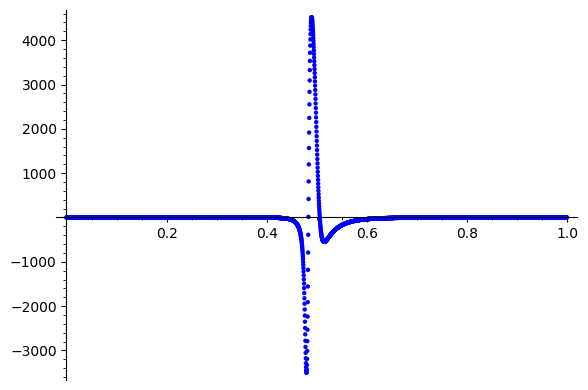

In [7]:
list_plot(t_fy)

In [8]:
# интегральная сумма силы по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

46.3292570072477944

In [9]:
# интегральная сумма силы, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

7.2555537782786630563

In [12]:
# интеграл силы по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False), \
        0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(46.32925700767882, 5.957132511229485e-08)

In [13]:
# интеграл силы, приложенной к зарядам, по периоду отнесённый к периоду
ans[0]/T

7.2555537783461652337

In [15]:
t_fy = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=2, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i,
                        omega = get_omega_d(v_c), to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans)]

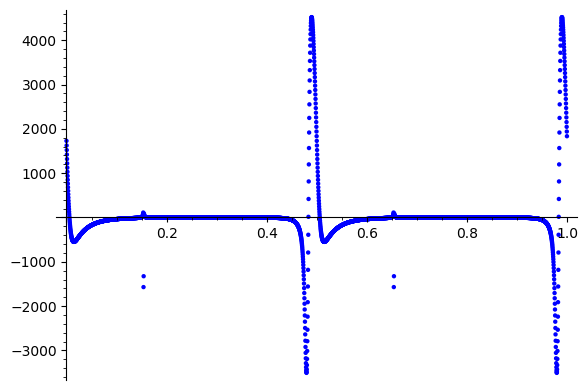

In [16]:
list_plot(t_fy)

In [17]:
# интегральная сумма силы по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

92.976850021790450405

In [18]:
# интегральная сумма силы по периоду отнесённая к периоду
sum_fy / T

14.560961669696439153

In [19]:
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=2, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False), 0, T)
ans

(92.00633189683043, 1.0861802885657182e-06)

In [20]:
# интеграл силы по периоду отнесённый к периоду
ans[0]/T

14.4089703168599370196

In [21]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(np.float128(-40), np.float128(+40), 40*2)
ya_linspace = np.linspace(np.float128(-40), np.float128(+40), 40*2)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t_ = ya_grid * np.nan
rlw_ = ya_grid * np.nan
s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan
ay_ = ya_grid * np.nan
am_ = ya_grid * np.nan
an_ = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max

t_cur = 7.5
q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        R = R_lw(Xa, Ya, Za, t_cur, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        rlw_[iy][ix] = R

        #(E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_cur, q)
        # The Poynting vector S is defined as to be equal
        # to the cross product (1/μ)E × B
        #S_x = E_y * B_z - E_z * B_y
        #S_y = E_z * B_x - E_x * B_z
        #S_z = E_x * B_y - E_y * B_x
        #sx_[iy][ix] = S_x
        #sy_[iy][ix] = S_y
        #sz_[iy][ix] = S_z
        
        (Al_x, Al_y, Al_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        (Ar_x, Ar_y, Ar_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega_d(v_c), alpha=0)
        ax_[iy][ix] = Al_x + Ar_x
        ay_[iy][ix] = Al_y + Ar_y
        am_[iy][ix] = sqrt((Al_x + Ar_x)^2 + (Al_y + Ar_y)^2)
        an_[iy][ix] = atan2((Al_y + Ar_y),(Al_x + Ar_x))

        #if sx_min > S_x:
        #    sx_min = S_x
        #if sx_max < S_x:
        #    sx_max = S_x        

        #if sy_min > S_y:
        #    sy_min = S_y
        #if sy_max < S_y:
        #    sy_max = S_y


        #u_[iy][ix] = E_x
        #v_[iy][ix] = E_y
        #e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        #t2 = t_lag(Xa, Ya, 0, t_cur)
        #t_[iy][ix] = t2


        phi_r = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        phi_l = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega_d(v_c), alpha=0)
        s_[iy][ix] = phi_r+phi_l
        #bz_[iy][ix] = B_z
        #if bz_min > B_z:
        #    bz_min = B_z
        #if bz_max < B_z:
        #    bz_max = B_z

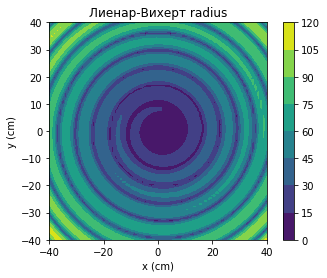

In [22]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, rlw_, levels = np.linspace(0, 32, 32/1+1))
cp = ax.contourf(xa_grid,ya_grid, rlw_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Лиенар-Вихерт radius')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

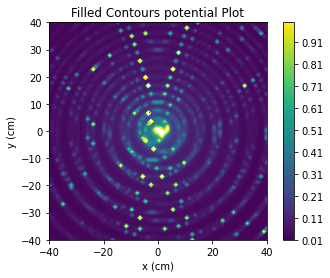

In [23]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, s_, levels = np.linspace(0.01, 1, int((1-0.01)/0.01+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours potential Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

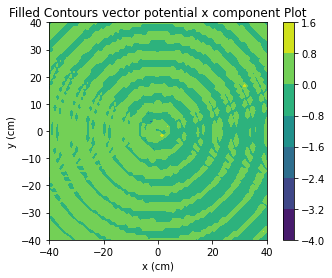

In [24]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, ax_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential x component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

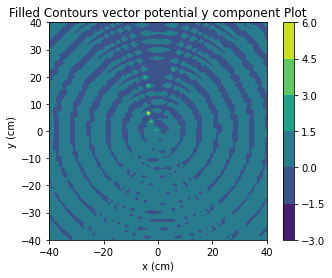

In [25]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, ay_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential y component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

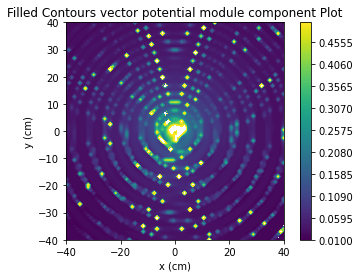

In [26]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, am_, levels = np.linspace(0.01, 0.5, int((1-0.01)/0.01+1)))
#cp = ax.contourf(xa_grid,ya_grid, am_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential module component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

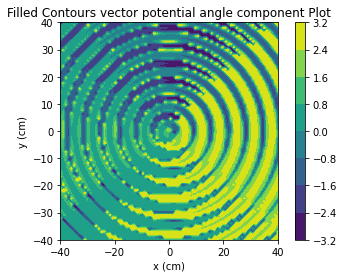

In [27]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, an_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, an_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential angle component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

In [28]:
# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
spherical_calc_Maxwells_stress_tensor = lambda r, theta, varphi, t : \
    calc_Maxwells_stress_tensor(X_a = r*sin(theta)*cos(varphi),
                                Y_a = r*cos(theta),
                                Z_a = r*sin(theta)*sin(varphi),
                                t_i = t,
                                N = 1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(),
                                cos_nx = - sin(theta)*cos(varphi),
                                cos_ny = - cos(theta),
                                cos_nz = - sin(theta)*sin(varphi),
                                omega = get_omega_d(v_c))

# направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

In [29]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R = 40 * get_R_l() + 20 * get_S()
R, R^2

(40.1, 1608.0100000000002)

In [30]:
spherical_calc_Maxwells_stress_tensor_R_t = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [31]:
stress_tensor_upper_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [32]:
stress_tensor_down_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [33]:
stress_tensor_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [34]:
T = np.float128(2*pi)/get_omega_d(v_c) # период вращения
time_steps_number = 360                # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [ ]:
t_py = []
t_py_up = []
t_py_dw = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans_up = stress_tensor_down_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_up)
    ans_dw = stress_tensor_upper_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_dw)
    print(i, (i/time_steps_number).n(), t_i, ans_up[0]+ans_dw[0])
    t_py_up += [(i/time_steps_number, ans_up[0])]
    t_py_dw += [(i/time_steps_number, ans_dw[0])]
    t_py += [(i/time_steps_number, ans_up[0]+ans_dw[0])]

0 0.000000000000000 0.0 (906.1524824499306, 0.00013702508764268373)
0 0.000000000000000 0.0 (-0.6050584795560199, 9.930762147514281e-08)
0 0.000000000000000 0.0 905.5474239703747
1 0.00277777777777778 0.017737085894251316403 (928.7603062979857, 3.476128038293509e-05)
1 0.00277777777777778 0.017737085894251316403 (-0.5923093269835707, 9.131042177461612e-08)
1 0.00277777777777778 0.017737085894251316403 928.1679969710021


In [ ]:
list_plot(t_py)

In [ ]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_py = 0
for (t_i, py) in t_py:
    sum_py += py * dt
sum_py

In [ ]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_py / T

In [ ]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_py_up = 0
for (t_i, py) in t_py_up:
    sum_py_up += py * dt
sum_py_up

In [ ]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_py_up / T

In [ ]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_py_dw = 0
for (t_i, py) in t_py_dw:
    sum_py_dw += py * dt
sum_py_dw

In [ ]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_py_dw / T

In [ ]:
spherical_calc_Maxwells_stress_tensor_R = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [ ]:
# "upper\\,half\\,sphere"

Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts_3)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere

In [ ]:
# "down\\,half\\,sphere"

Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere + Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.

In [ ]:
calc_sum_Fy_t(N=1, S=S, R_l=R_l, R_r=R_r, t_i = 1)